In [35]:
import sys
sys.path.append('..')

from model.ARIMA import pipline

import pandas as pd

In [18]:
data = pd.read_csv('../data\circuit_flight\dense_flights_data.csv')

In [42]:
flight1 = data.loc[data['FLIGHT_ID'] == 'AS64']
flight2 = data.loc[data['FLIGHT_ID'] == 'AS65']
flight3 = data.loc[data['FLIGHT_ID'] == 'DL2452']
flight4 = data.loc[data['FLIGHT_ID'] == 'DL1270']
flights = [flight1,flight2,flight3,flight4]

In [44]:
P1 = pipline(flight1,False,True)
P2 = pipline(flight2,False,True)
P3 = pipline(flight3,False,True)
P4 = pipline(flight4,False,True)

piplines = [P1,P2,P3,P4]

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1452
Model:               SARIMAX(4, 0, 3)   Log Likelihood               -2793.857
Date:                Thu, 09 May 2024   AIC                           5605.714
Time:                        13:59:58   BIC                           5653.240
Sample:                             0   HQIC                          5623.448
                               - 1452                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.9501      3.948      1.000      0.317      -3.788      11.688
ar.L1         -0.2237      0.252     -0.887      0.375      -0.718       0.270
ar.L2          0.7464      0.259      2.878      0.0

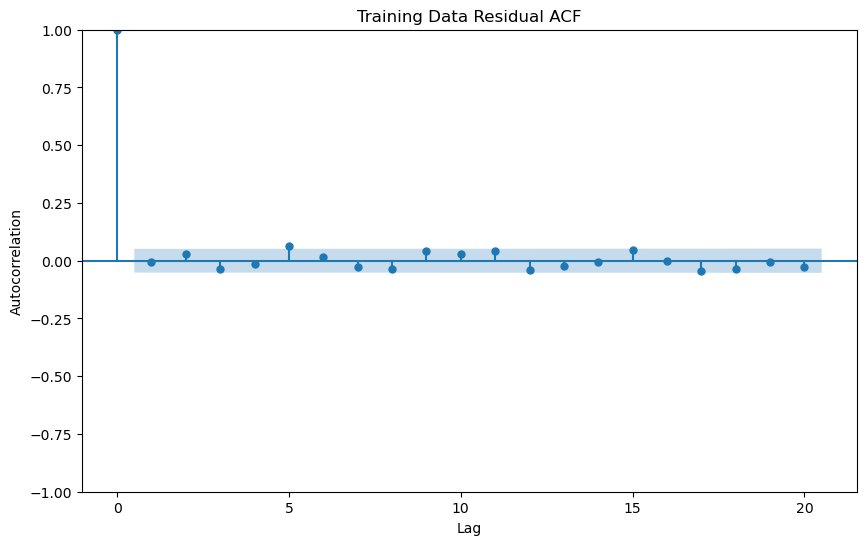

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1451
Model:               SARIMAX(3, 1, 4)   Log Likelihood               -3192.628
Date:                Thu, 09 May 2024   AIC                           6401.256
Time:                        14:00:26   BIC                           6443.491
Sample:                             0   HQIC                          6417.017
                               - 1451                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1272      0.039    -29.231      0.000      -1.203      -1.052
ar.L2         -0.2210      0.062     -3.558      0.000      -0.343      -0.099
ar.L3          0.4764      0.039     12.327      0.0

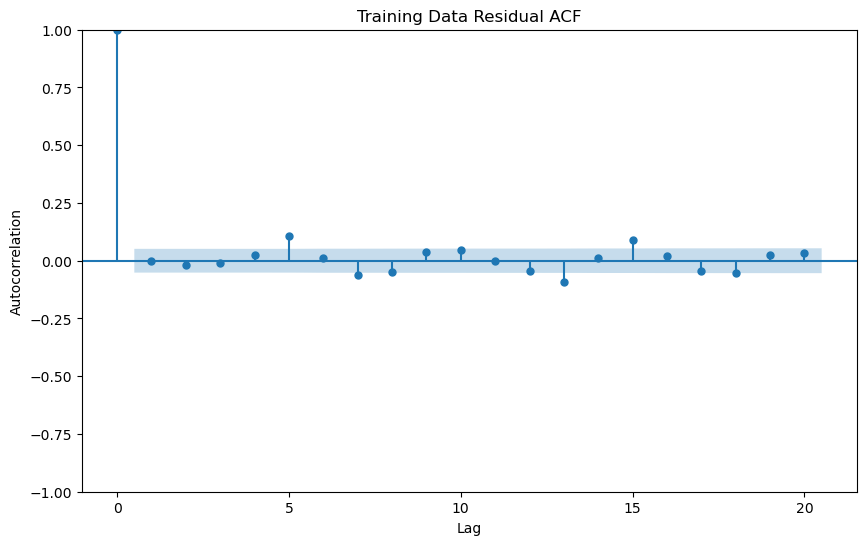

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  584
Model:               SARIMAX(2, 0, 4)   Log Likelihood               -1611.089
Date:                Thu, 09 May 2024   AIC                           3238.177
Time:                        14:00:34   BIC                           3273.137
Sample:                             0   HQIC                          3251.803
                                - 584                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2281      0.855      1.437      0.151      -0.447       2.904
ar.L1         -0.0494      0.035     -1.428      0.153      -0.117       0.018
ar.L2          0.9501      0.035     27.456      0.0

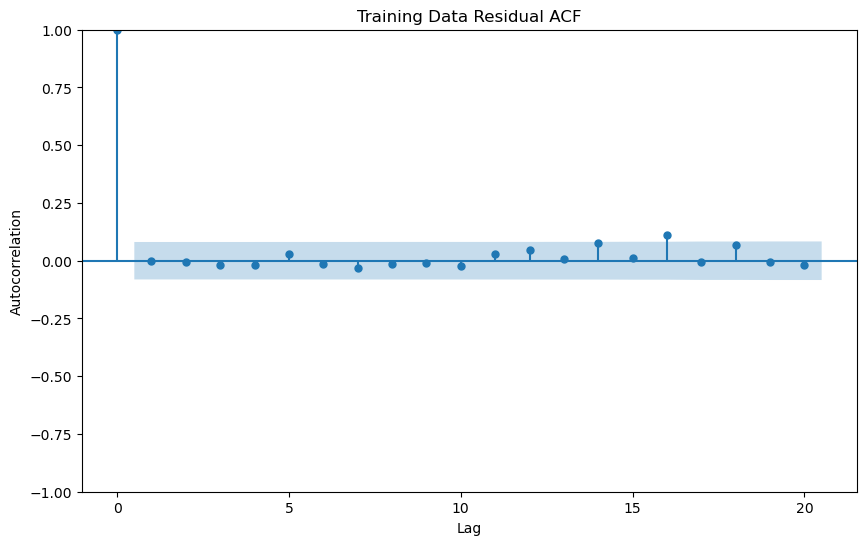

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  583
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1340.383
Date:                Thu, 09 May 2024   AIC                           2690.767
Time:                        14:00:37   BIC                           2712.599
Sample:                             0   HQIC                          2699.277
                                - 583                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6506      0.041    -15.872      0.000      -0.731      -0.570
ar.L2          0.3380      0.039      8.772      0.000       0.262       0.413
ma.L1         -0.0123      0.020     -0.601      0.5

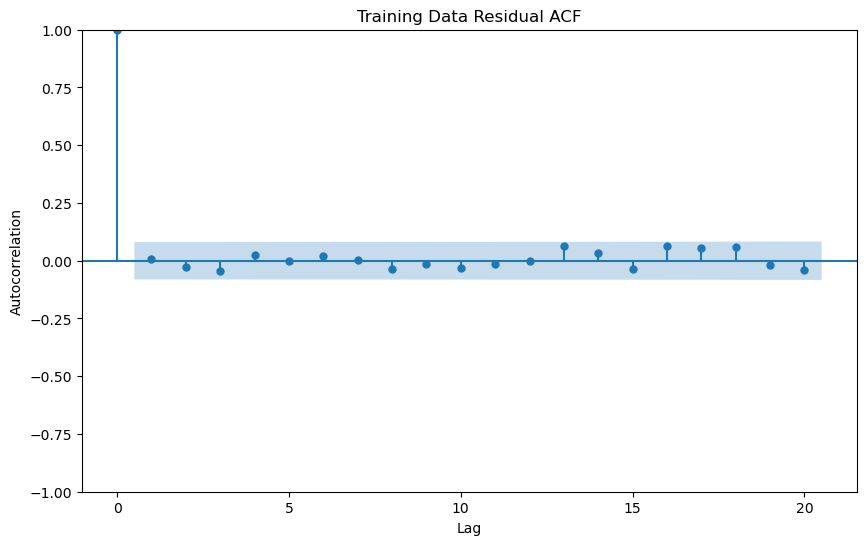

In [46]:
for p in piplines:
    p.fit()
    p.summary()

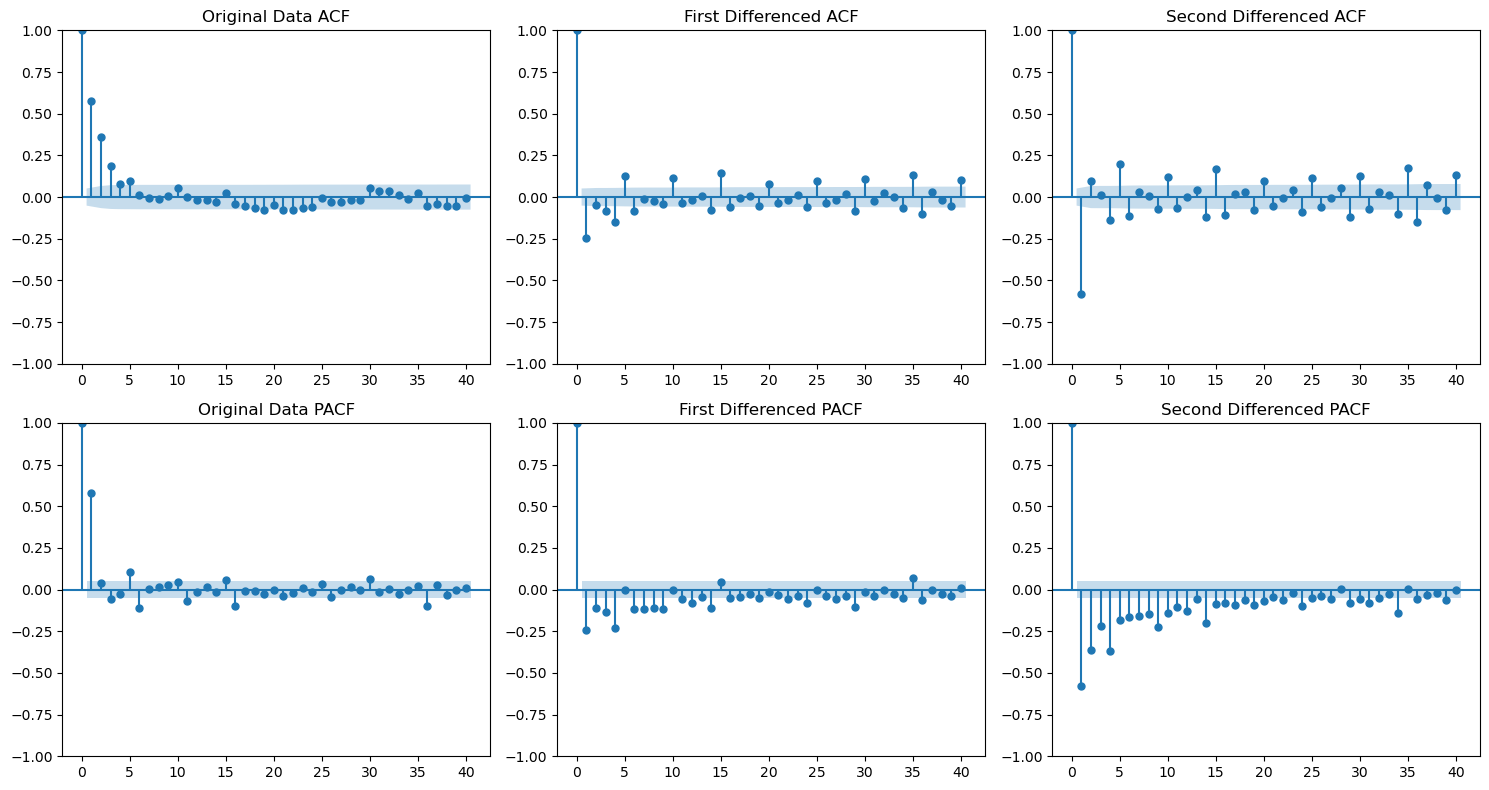

Augmented Dickey-Fuller Test with 0 differencing:
Test Statistic: -9.4121
p-value: 0.0000
Critical Values:
	1%: -3.4349
	5%: -2.8636
	10%: -2.5678
Reject the null hypothesis. The series is stationary.


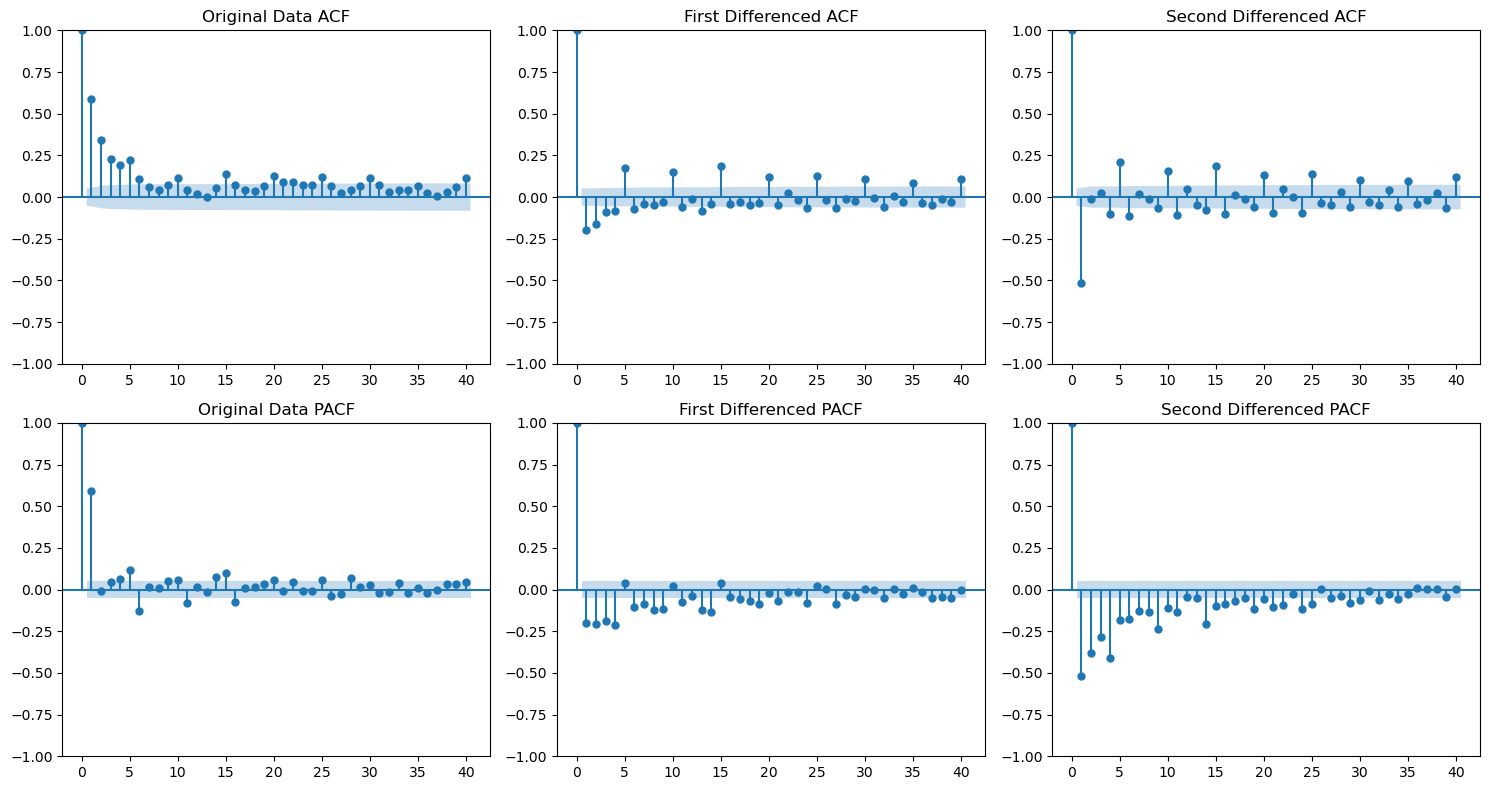

Augmented Dickey-Fuller Test with 1 differencing:
Test Statistic: -13.0887
p-value: 0.0000
Critical Values:
	1%: -3.4349
	5%: -2.8636
	10%: -2.5679
Reject the null hypothesis. The series is stationary.


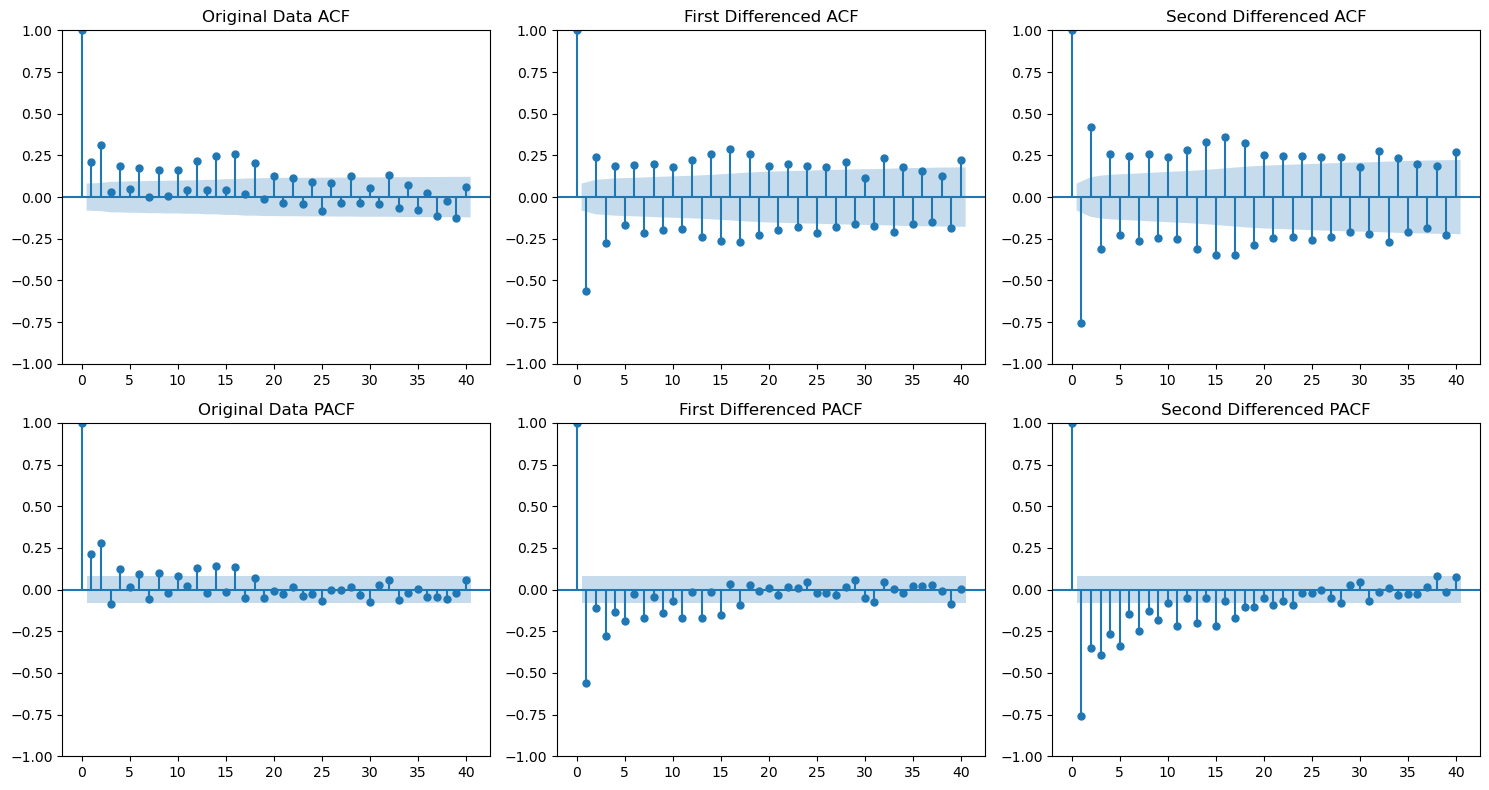

Augmented Dickey-Fuller Test with 0 differencing:
Test Statistic: -3.0410
p-value: 0.0312
Critical Values:
	1%: -3.4420
	5%: -2.8667
	10%: -2.5695
Reject the null hypothesis. The series is stationary.


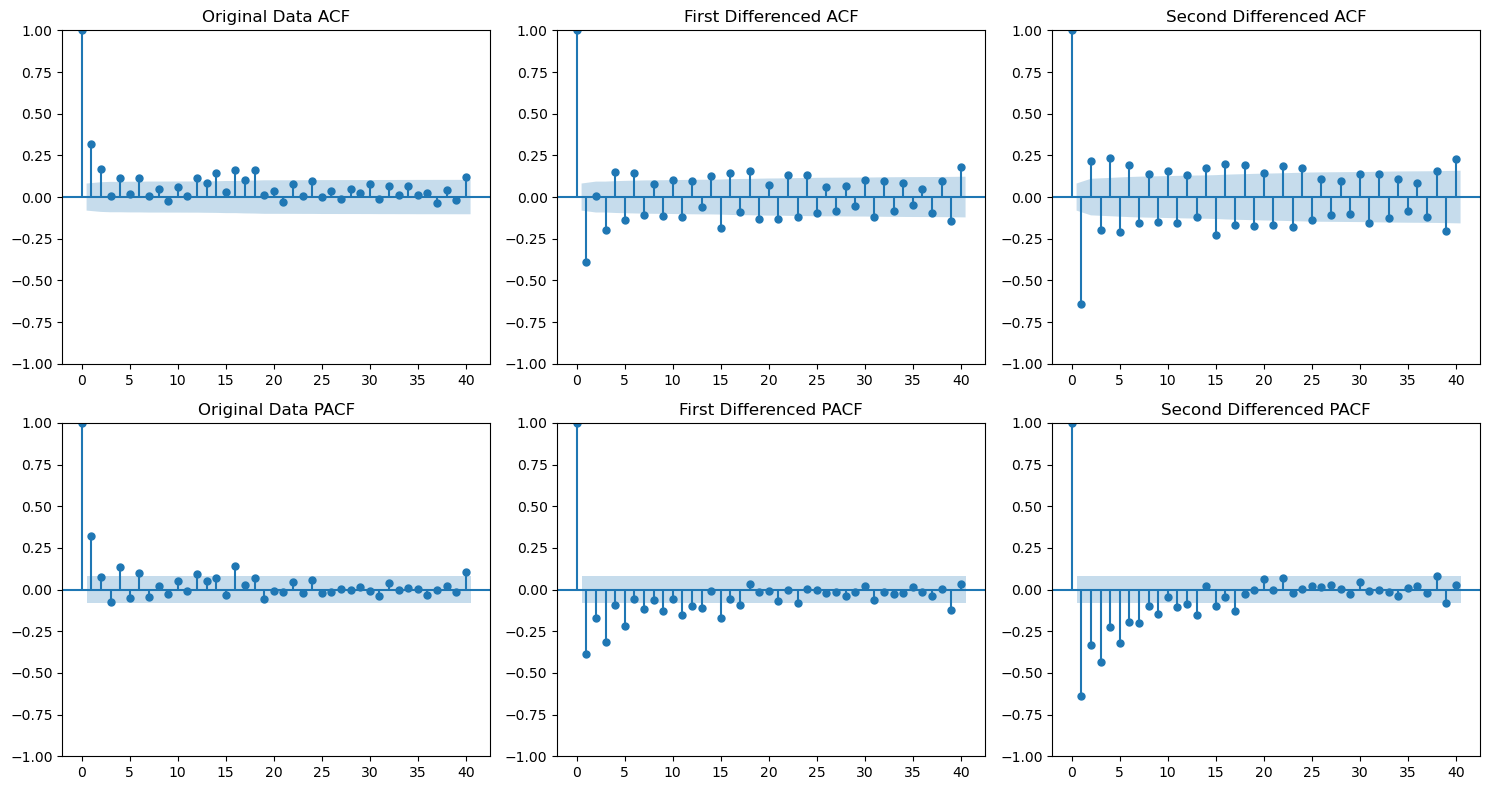

Augmented Dickey-Fuller Test with 1 differencing:
Test Statistic: -10.9286
p-value: 0.0000
Critical Values:
	1%: -3.4420
	5%: -2.8667
	10%: -2.5695
Reject the null hypothesis. The series is stationary.


In [47]:
for p in piplines:
    p.ACF()
    p.UnitSquare(p.model.order[1])

RMSE: 30.175
MAE: 18.910
MAPE: 20282762885437932.000%


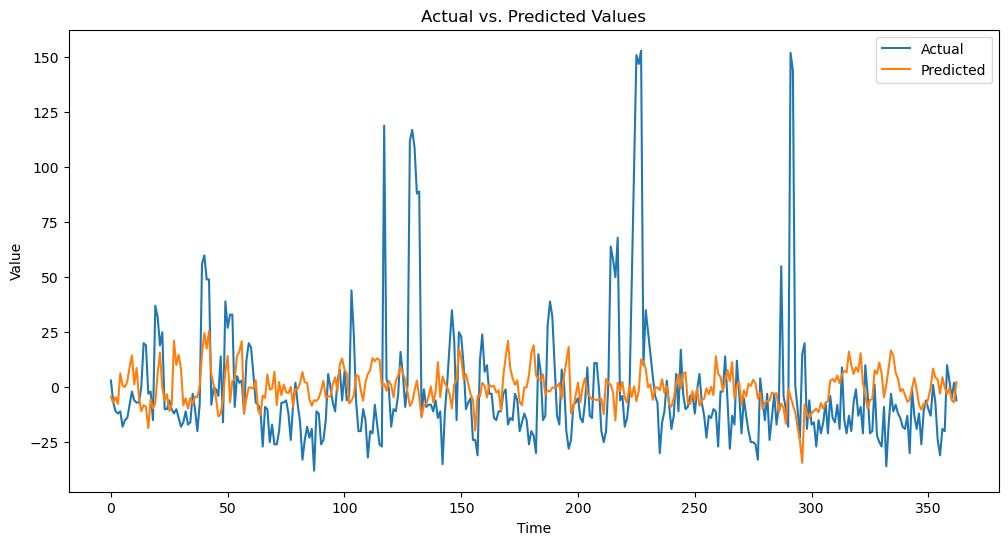

RMSE: 33.297
MAE: 19.821
MAPE: 71684828710209424.000%


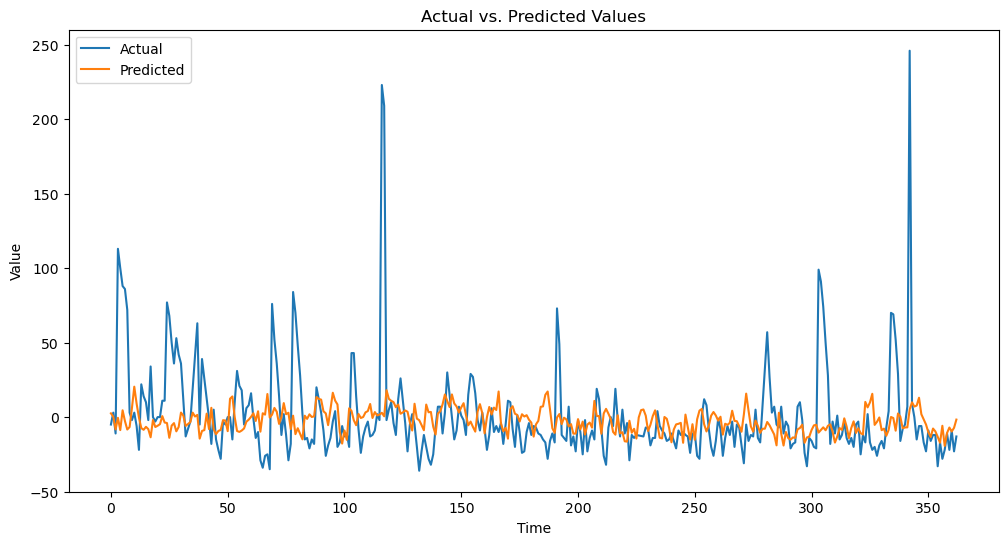

RMSE: 15.304
MAE: 10.404
MAPE: 12035430277286112.000%


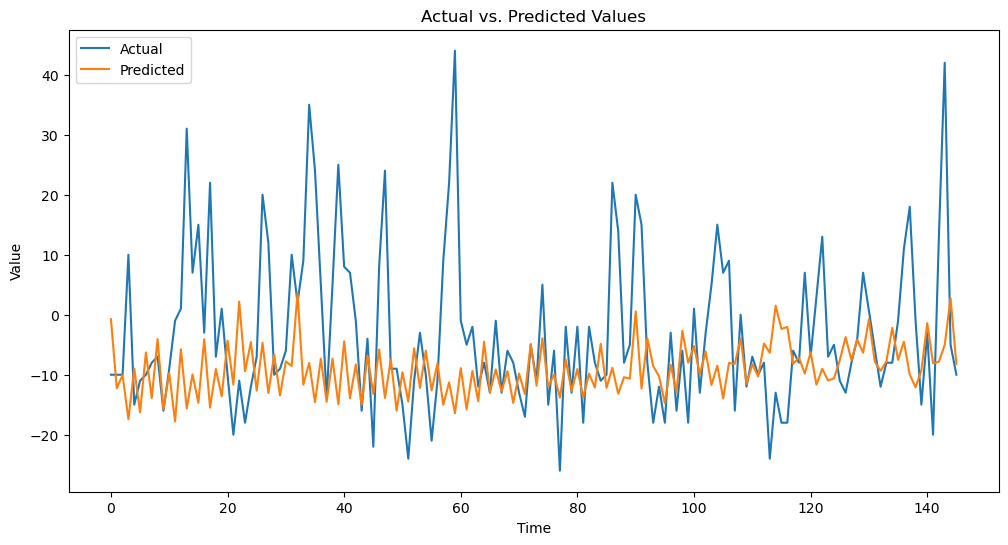

RMSE: 33.304
MAE: 13.659
MAPE: 86163175576194544.000%


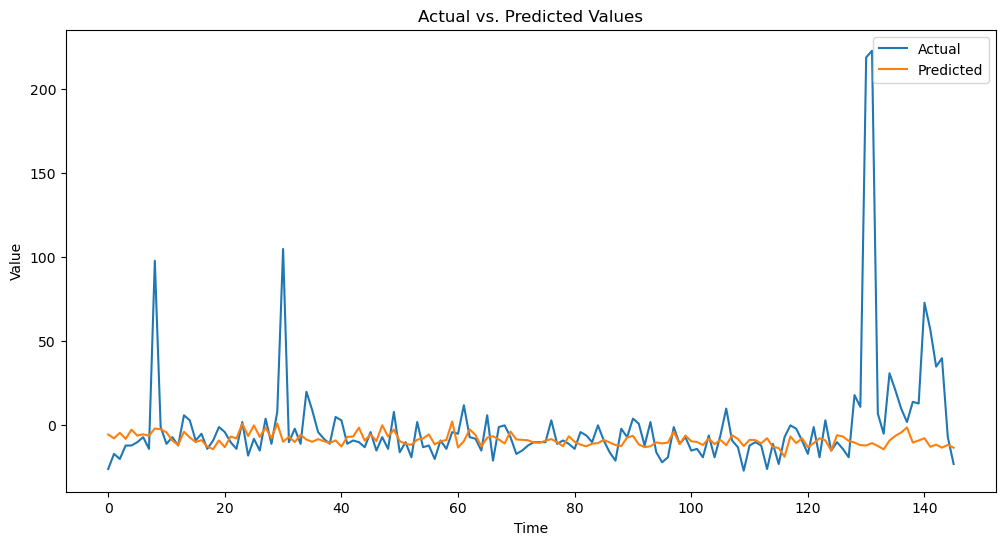

In [48]:
for p in piplines:
    p.metrics()
    p.plot()